In [1]:
!pip install scipy

In [2]:
!pip install researchpy

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [5]:
bike_sharing_data = pd.read_csv('/content/day.csv')

bike_sharing_data.shape

(731, 16)

In [6]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [16]:
bike_sharing_data.to_csv('/content/bike_sharing_data_processed.csv', index=False)

In [15]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [17]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [18]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [19]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [20]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [21]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [22]:
bike_sharing_data.shape

(731, 7)

In [23]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


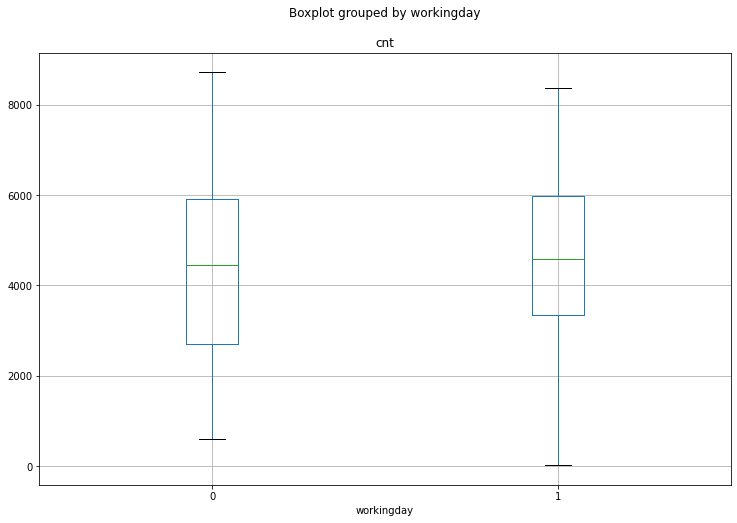

In [24]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(12, 8))

In [26]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [28]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [30]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`__

### Homogeneity of variance
Of these tests, the most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

To know, [Click here](https://en.wikipedia.org/wiki/Levene%27s_test) why we test for levene's test?

In [31]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=5.959727062187346, pvalue=0.015012294495014242)

### p-value is greater than 0.05 thus Null Hypothesis is Rejected & Variances in both the sample groups are Equal.

## Normal distribution  of residuals

### Checking difference between two pair points

https://pythonfordatascience.org/independent-t-test-python/

(array([ 6.,  7., 13., 25., 34., 50., 37., 35., 16.,  8.]),
 array([-2.76680375, -2.26653396, -1.76626417, -1.26599438, -0.76572459,
        -0.2654548 ,  0.23481499,  0.73508479,  1.23535458,  1.73562437,
         2.23589416]),
 <a list of 10 Patch objects>)

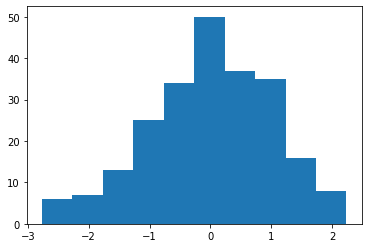

In [32]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))

plt.hist(diff)

### Checking for normality by Q-Q plot graph

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

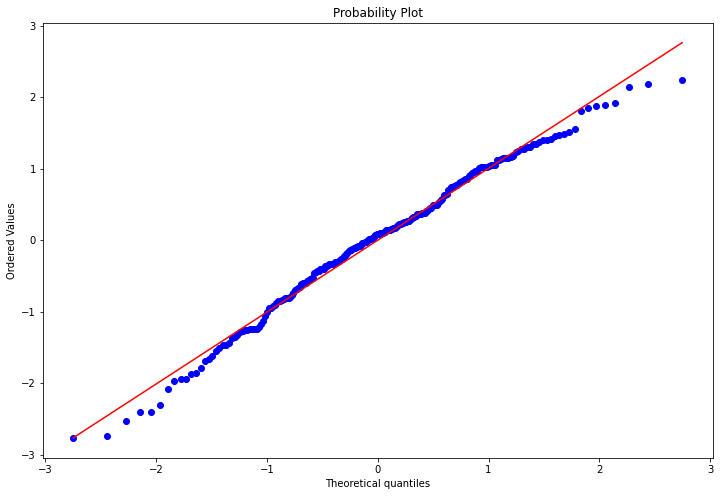

In [33]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

### Checking normal distribution by `shapiro method`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [34]:
stats.shapiro(diff)

(0.9885777831077576, 0.06338067352771759)

__Note:-__[See here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test)

W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

### Independent t-test by using `scipy.stats`

In [35]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.1647854168153375, pvalue=0.24470955410534603)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [36]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [37]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4540.792208,1828.101776,120.280266,4303.800178,4777.784238
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4435.480519,1944.104491,90.447927,4257.739199,4613.221840


In [38]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   210.6234
1      Degrees of freedom =   460.0000
2                       t =     1.1648
3   Two side test p value =     0.2447
4  Difference < 0 p value =     0.8776
5  Difference > 0 p value =     0.1224
6               Cohen's d =     0.1084
7               Hedge's g =     0.1082
8           Glass's delta =     0.1152
9                       r =     0.0542


### Null Hypothesis is Failed to Reject implies the means of the two groups are statistically same. 

In [39]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


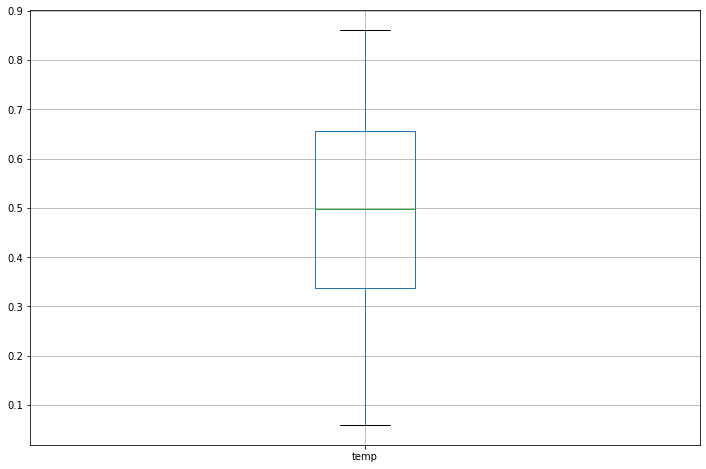

In [40]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [41]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [42]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
645,4,10,0,0,2,0.415833,3510,False
243,3,9,0,1,1,0.655000,5115,True
571,3,7,0,1,1,0.724167,8173,True
371,1,1,0,0,1,0.393333,4521,False
610,3,9,0,0,2,0.696667,5810,True
472,2,4,0,1,1,0.608333,6691,True
333,4,11,0,1,1,0.325000,3613,False
494,2,5,0,1,2,0.575000,4717,True
584,3,8,0,1,2,0.735833,7273,True
511,2,5,0,0,1,0.692500,6536,True


In [43]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


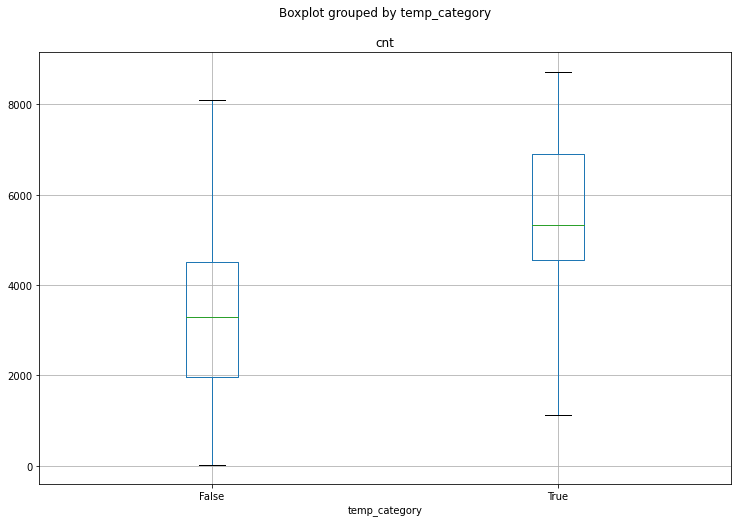

In [44]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [45]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [46]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [47]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [48]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.816406719783438, pvalue=0.028506071621148755)

(array([ 3.,  6., 11., 24., 61., 56., 83., 62., 37., 21.]),
 array([-3.30636453, -2.76551582, -2.2246671 , -1.68381839, -1.14296967,
        -0.60212096, -0.06127225,  0.47957647,  1.02042518,  1.5612739 ,
         2.10212261]),
 <a list of 10 Patch objects>)

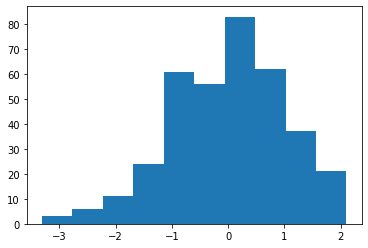

In [49]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

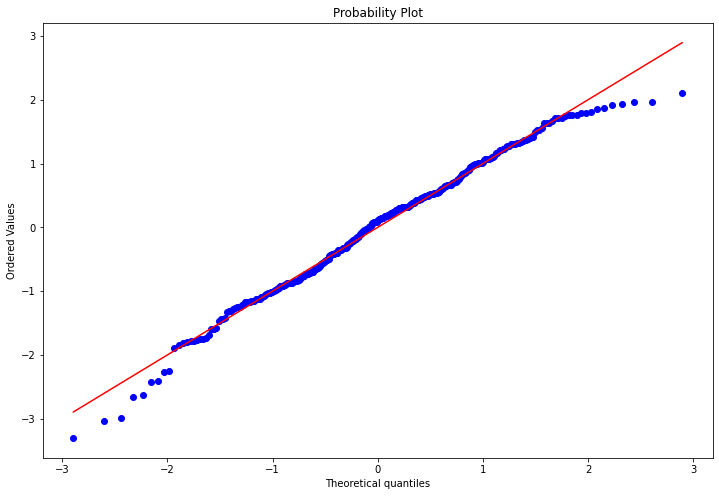

In [50]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

In [51]:
stats.shapiro(diff)

(0.9880121946334839, 0.004284055903553963)

In [52]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.948092775073885, pvalue=2.3167921027750358e-65)

In [53]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [54]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5615.502747,1473.544348,77.234710,5463.619096,5767.386398
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4501.583791,1937.793494,71.819405,4360.585606,4642.581976


In [55]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2227.8379
1      Degrees of freedom =    712.6278
2                       t =     18.9481
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.4045
7               Hedge's g =      1.4031
8           Glass's delta =      1.5119
9                       r =      0.5788


### p-value is less than 0.05 thus Null Hypothesis is Rejected i,e the means of two groups are statistically significant/ different. Temprature is a Significant feature on which Count of Bike rented depends.